In [1]:
from sklearn.datasets import make_moons
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans

In [2]:
x,y=make_moons(100)
data=pd.DataFrame(x)
data.head()

,0,1
0,-0.838088,0.545535
1,1.801414,-0.098111
2,0.991790,0.127877
3,-0.672301,0.740278
4,0.345365,0.938468


In [3]:
data.columns=["f1","f2"]
data.head()

,f1,f2
0,-0.838088,0.545535
1,1.801414,-0.098111
2,0.991790,0.127877
3,-0.672301,0.740278
4,0.345365,0.938468


In [4]:
data["class"]=y

C:\Users\Chetan\AppData\Local\Temp\ipykernel_20072\2984020764.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)


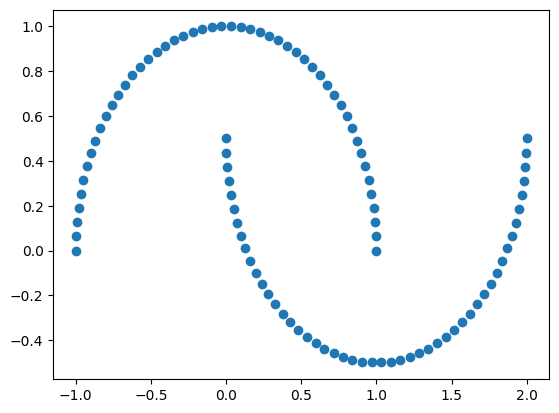

In [5]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

### With KMeans Clustering

In [7]:
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'elkan')
model.fit(data.drop('class',axis=1))
claas_pr=model.predict(data.iloc[:,:2])
data["class_pr"]=claas_pr
data.head()

,f1,f2,class,class_pr
0,-0.838088,0.545535,0,0
1,1.801414,-0.098111,1,1
2,0.991790,0.127877,0,1
3,-0.672301,0.740278,0,0
4,0.345365,0.938468,0,0


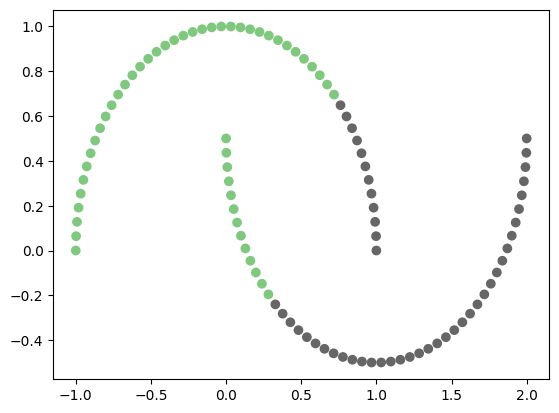

In [8]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)

### With DBSCAN Clustering

In [10]:
dbs=DBSCAN(min_samples=2,eps=0.2) #min_samples is m/n
claas_pr=dbs.fit_predict(data.iloc[:,:2])

In [11]:
data["class_pr"]=claas_pr
data

,f1,f2,class,class_pr
0,-0.838088,0.545535,0,0
1,1.801414,-0.098111,1,1
2,0.991790,0.127877,0,0
3,-0.672301,0.740278,0,0
4,0.345365,0.938468,0,0
...,...,...,...,...
95,1.991790,0.372123,1,1
96,-0.981559,0.191159,0,0
97,0.427883,-0.320172,1,1
98,0.572117,0.820172,0,0


Text(0, 0.5, 'f2')

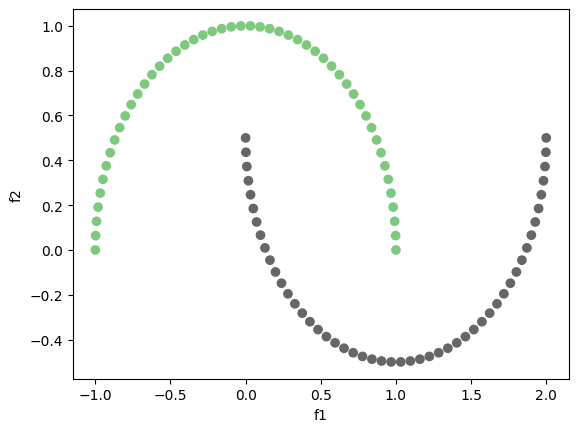

In [12]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)
plt.xlabel("f1")
plt.ylabel("f2")